<a href="https://colab.research.google.com/github/OlegKret/---/blob/master/Genetic_Alg_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generation 1:
  Best Individual (x, y): (5.0000, -0.1429)
  Best Fitness: 49.9796
Generation 2:
  Best Individual (x, y): (5.0000, -0.1429)
  Best Fitness: 49.9796
Generation 3:
  Best Individual (x, y): (5.0000, -0.1429)
  Best Fitness: 49.9796
Generation 4:
  Best Individual (x, y): (5.0000, -0.1429)
  Best Fitness: 49.9796
Generation 5:
  Best Individual (x, y): (5.0000, -0.1429)
  Best Fitness: 49.9796
Generation 6:
  Best Individual (x, y): (5.0000, -0.1429)
  Best Fitness: 49.9796
Generation 7:
  Best Individual (x, y): (5.0000, -0.1429)
  Best Fitness: 49.9796
Generation 8:
  Best Individual (x, y): (5.0000, -0.1429)
  Best Fitness: 49.9796
Generation 9:
  Best Individual (x, y): (5.0000, -0.1429)
  Best Fitness: 49.9796
Generation 10:
  Best Individual (x, y): (5.0000, -0.1429)
  Best Fitness: 49.9796
Generation 11:
  Best Individual (x, y): (5.0000, -0.1429)
  Best Fitness: 49.9796
Generation 12:
  Best Individual (x, y): (5.0000, -0.1429)
  Best Fitness: 49.9796
Generation 13

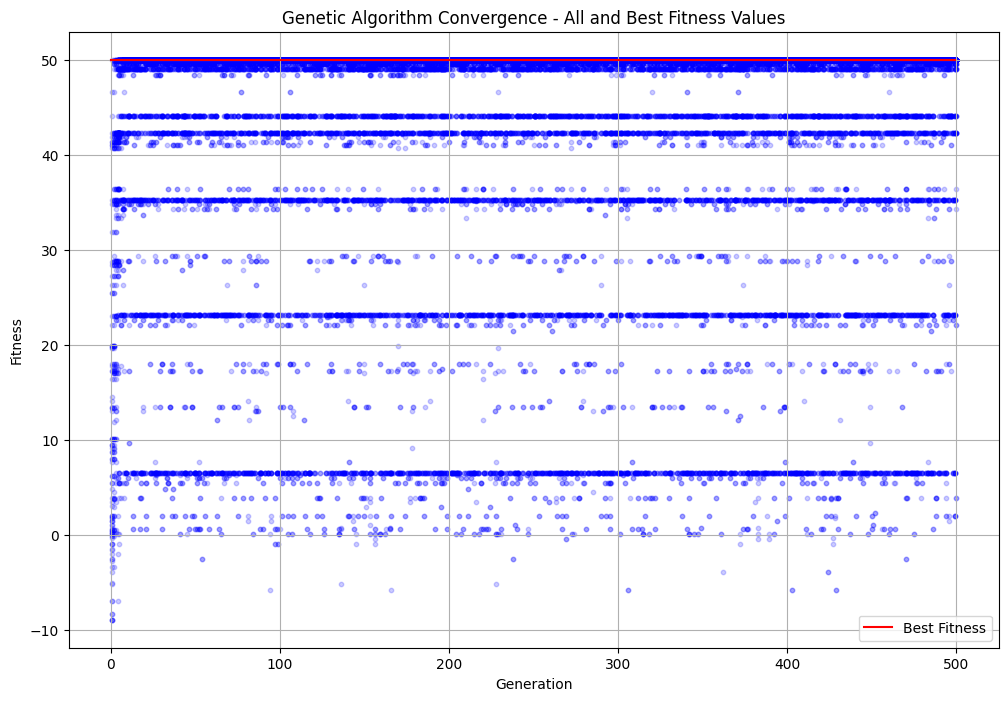

In [11]:
import random
import matplotlib.pyplot as plt
import numpy as np  # Import numpy

# Define the function to maximize
def function_to_maximize(x, y):
    return 2*x**2 - y**2

# Define problem parameters
BOUNDS = ((-1, 5), (-3, 1))  # Updated bounds for x and y
ACCURACY = 0.1

# Calculate chromosome lengths based on accuracy and bounds
def calculate_chromosome_length(bounds, accuracy):
    L = int(round(np.log2((bounds[1] - bounds[0]) * 10**accuracy) + 1))
    return max(L, 1)  # Ensure chromosome length is at least 1

# Define problem parameters
CHROMOSOME_LENGTH_X = calculate_chromosome_length(BOUNDS[0], ACCURACY)
CHROMOSOME_LENGTH_Y = calculate_chromosome_length(BOUNDS[1], ACCURACY)
POPULATION_SIZE = 100
MAX_GENERATIONS = 500

# Chromosome encoding and decoding
def encode(value, bounds):
    h = (bounds[1] - bounds[0]) / (2**calculate_chromosome_length(bounds, ACCURACY) - 1)
    return int(round((value - bounds[0]) / h))

def decode(chromosome, bounds):
    h = (bounds[1] - bounds[0]) / (2**calculate_chromosome_length(bounds, ACCURACY) - 1)
    return bounds[0] + chromosome * h

# Genetic Algorithm
def main():
    random.seed(64)

    # Initialize population
    population = []
    for _ in range(POPULATION_SIZE):
        individual = [
            random.randint(0, 2**CHROMOSOME_LENGTH_X - 1),
            random.randint(0, 2**CHROMOSOME_LENGTH_Y - 1)
        ]
        population.append(individual)

    best_values = []  # Store best fitness values
    all_values = []   # Store all fitness values for each generation

    for generation in range(MAX_GENERATIONS):
        # Evaluate fitness
        fitness_values = [function_to_maximize(decode(ind[0], BOUNDS[0]), decode(ind[1], BOUNDS[1])) for ind in population]
        all_values.append(fitness_values)  # Store all values for this generation

        # Find the best individual in this generation
        best_index = max(range(len(population)), key=lambda i: fitness_values[i])
        best_individual = population[best_index]
        best_x, best_y = decode(best_individual[0], BOUNDS[0]), decode(best_individual[1], BOUNDS[1])
        best_fitness = fitness_values[best_index]

        # Print results for this generation
        print(f"Generation {generation + 1}:")
        print(f"  Best Individual (x, y): ({best_x:.4f}, {best_y:.4f})")
        print(f"  Best Fitness: {best_fitness:.4f}")
        best_values.append(best_fitness)


        # Selection (Tournament Selection)
        selected_indices = [
            max(random.sample(range(POPULATION_SIZE), 3), key=lambda i: fitness_values[i])
            for _ in range(POPULATION_SIZE)
        ]
        selected_parents = [population[i] for i in selected_indices]

        # Crossover and Mutation
        offspring = []
        for _ in range(POPULATION_SIZE // 2):
            parent1, parent2 = random.sample(selected_parents, 2)
            child1, child2 = parent1[:], parent2[:]
            if random.random() < 0.5:
                crossover_point_x = random.randint(1, CHROMOSOME_LENGTH_X - 1)  # Use correct length
                crossover_point_y = random.randint(1, CHROMOSOME_LENGTH_Y - 1)

                child1[0] = (parent1[0] & ((1 << crossover_point_x) - 1)) | (parent2[0] & ~((1 << crossover_point_x) - 1))
                child2[0] = (parent2[0] & ((1 << crossover_point_x) - 1)) | (parent1[0] & ~((1 << crossover_point_x) - 1))

                child1[1] = (parent1[1] & ((1 << crossover_point_y) - 1)) | (parent2[1] & ~((1 << crossover_point_y) - 1))
                child2[1] = (parent2[1] & ((1 << crossover_point_y) - 1)) | (parent1[1] & ~((1 << crossover_point_y) - 1))

            for i in range(2):
                for j in range(CHROMOSOME_LENGTH_X if i == 0 else CHROMOSOME_LENGTH_Y):  # Use correct length for each gene
                    if random.random() < 0.05:
                        child1[i] ^= 1 << j
                        child2[i] ^= 1 << j

            offspring.extend([child1, child2])

        population = offspring


    # Find the best individual
    best_individual = max(population, key=lambda ind: function_to_maximize(decode(ind[0], BOUNDS[0]), decode(ind[1], BOUNDS[1])))
    best_x, best_y = decode(best_individual[0], BOUNDS[0]), decode(best_individual[1], BOUNDS[1])

    return best_individual, best_values, best_x, best_y, all_values

# Run the genetic algorithm and plot
best_individual, best_values, best_x, best_y, all_values = main()
print("Best individual (chromosome):", best_individual)
print("Best individual (x, y):", best_x, best_y)
print("Maximum value:", function_to_maximize(best_x, best_y))

# Create a plot for all fitness values across generations
plt.figure(figsize=(12, 8))

# Plot all fitness values for each generation
for generation, values in enumerate(all_values):
    plt.scatter([generation + 1] * len(values), values, color='blue', alpha=0.2, s=10)  # Scatter plot for all values

# Plot the best fitness line (same as before)
plt.plot(best_values, color='red', label="Best Fitness")

plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Genetic Algorithm Convergence - All and Best Fitness Values")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
!pip install deep